# Social Graphs Project

## Pre-processing

### Imports

In [3]:
import pandas as pd
import numpy as np
import re
import urllib.request
import json
import os
import string  
import math
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import seaborn as sns
import networkx as nx
import community
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
from fa2 import ForceAtlas2
from PIL import Image, ImageFont
import requests
import json
import re

### Extract wiki data

In [114]:
token = '36b7db9d9db4c52f7b5604c51aa31ffd923abf33'
headers = {'Authorization': 'token ' + token}

username = df['user_name'][0]
print('User: ',username)

url = f"https://api.github.com/users/{username}"
user_data = requests.get(url, headers=headers).json()
user_data

User:  josephmisiti


{'login': 'josephmisiti',
 'id': 246302,
 'node_id': 'MDQ6VXNlcjI0NjMwMg==',
 'avatar_url': 'https://avatars0.githubusercontent.com/u/246302?v=4',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/josephmisiti',
 'html_url': 'https://github.com/josephmisiti',
 'followers_url': 'https://api.github.com/users/josephmisiti/followers',
 'following_url': 'https://api.github.com/users/josephmisiti/following{/other_user}',
 'gists_url': 'https://api.github.com/users/josephmisiti/gists{/gist_id}',
 'starred_url': 'https://api.github.com/users/josephmisiti/starred{/owner}{/repo}',
 'subscriptions_url': 'https://api.github.com/users/josephmisiti/subscriptions',
 'organizations_url': 'https://api.github.com/users/josephmisiti/orgs',
 'repos_url': 'https://api.github.com/users/josephmisiti/repos',
 'events_url': 'https://api.github.com/users/josephmisiti/events{/privacy}',
 'received_events_url': 'https://api.github.com/users/josephmisiti/received_events',
 'type': 'User',
 'site_admin': Fa

In [118]:
url = f'https://api.github.com/users/{username}/repos?page=1&per_page=100'
rep_data = requests.get(url, headers=headers).json()
rep_data

[{'id': 150311047,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxNTAzMTEwNDc=',
  'name': '80s.nyc',
  'full_name': 'josephmisiti/80s.nyc',
  'private': False,
  'owner': {'login': 'josephmisiti',
   'id': 246302,
   'node_id': 'MDQ6VXNlcjI0NjMwMg==',
   'avatar_url': 'https://avatars0.githubusercontent.com/u/246302?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/josephmisiti',
   'html_url': 'https://github.com/josephmisiti',
   'followers_url': 'https://api.github.com/users/josephmisiti/followers',
   'following_url': 'https://api.github.com/users/josephmisiti/following{/other_user}',
   'gists_url': 'https://api.github.com/users/josephmisiti/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/josephmisiti/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/josephmisiti/subscriptions',
   'organizations_url': 'https://api.github.com/users/josephmisiti/orgs',
   'repos_url': 'https://api.github.com/users/josephmisiti/repos',
   'events_

### Data cleaning

In [4]:
df = pd.read_csv('data/git_data_second.csv', converters={'following': eval}, index_col=0)
df['languages'] = df['languages'].str.replace(' ',',').str.replace('\n','').str.replace("'","")
df.head(5)

user_name         owner                                    repos  \
0  josephmisiti  josephmisiti                 awesome-machine-learning   
1          wepe          wepe                          MachineLearning   
2       ZuzooVn       ZuzooVn  machine-learning-for-software-engineers   
3         rasbt         rasbt             python-machine-learning-book   
4  Jack-Cherish  Jack-Cherish                         Machine-Learning   

                name  type                  company        location  \
0      Joseph Misiti  User           Math & Pencil     Brooklyn, NY   
1              wepon  User                   AntFin  China Hangzhou   
2             Nam Vu  User                      NaN         Vietnam   
3  Sebastian Raschka  User               UW-Madison     Madison, WI   
4           Jack Cui  User  Northeastern University           China   

                                                 bio            created_at  \
0        Mathematician & Co-founder of Math & Pencil  2010-04-17T21:09:13Z   
1                                                NaN  2014-10-10T14:28:18Z   
2  A Vietnamese Software Engineer who is really p...  2012-02-11T16:55:02Z   
3  Machine Learning researcher & open source cont...  2013-10-05T16:06:10Z   
4                            :octocat:公众号：JackCui-AI  2016-01-25T03:38:06Z   

             updated_at                                          following  \
0  2020-10-29T18:11:39Z  [mojombo, defunkt, vanpelt, macournoyer, ry, b...   
1  2020-11-05T15:54:10Z  [pluskid, benanne, colah, kennethreitz42, karp...   
2  2020-10-12T02:40:45Z  [ole, escoz, pokeb, tcdoan, dyang, kirill-grou...   
3  2020-11-09T23:00:46Z  [ctb, ogrisel, tacaswell, GaelVaroquaux, mblon...   
4  2020-07-31T13:54:15Z  [kennethreitz42, karpathy, marvis, shicai, tia...   

                                         description  \
0   SDK and example code for building voice-enabl...   
1  1st Place Season one & 6th Place Season two1st...   
2  Android executables browserEasy to use CFNetwo...   
3  My Solutions for the Advent of Code 2016A repo...   
4  :art:冒泡排序；直接插入排序；希尔排序；快速排序；堆排序；归并排序；基数排序C/C++:...   

                                           languages  
0  [C,C++,CSS,Go,Java,JavaScript,Jupyter,Notebook...  
1                       [C++,HTML,Java,Python,Shell]  
2  [C,DIGITAL,Command,Language,HTML,Java,JavaScri...  
3  [C,C++,CSS,HTML,Jupyter,Notebook,Lua,OpenEdge,...  
4                                  [C++,HTML,Python]

In [6]:
df.head(5)

user_name         owner                                    repos  \
0  josephmisiti  josephmisiti                 awesome-machine-learning   
1          wepe          wepe                          MachineLearning   
2       ZuzooVn       ZuzooVn  machine-learning-for-software-engineers   
3         rasbt         rasbt             python-machine-learning-book   
4  Jack-Cherish  Jack-Cherish                         Machine-Learning   

                name  type                  company        location  \
0      Joseph Misiti  User           Math & Pencil     Brooklyn, NY   
1              wepon  User                   AntFin  China Hangzhou   
2             Nam Vu  User                      NaN         Vietnam   
3  Sebastian Raschka  User               UW-Madison     Madison, WI   
4           Jack Cui  User  Northeastern University           China   

                                                 bio            created_at  \
0        Mathematician & Co-founder of Math & Pencil  2010-04-17T21:09:13Z   
1                                                NaN  2014-10-10T14:28:18Z   
2  A Vietnamese Software Engineer who is really p...  2012-02-11T16:55:02Z   
3  Machine Learning researcher & open source cont...  2013-10-05T16:06:10Z   
4                            :octocat:公众号：JackCui-AI  2016-01-25T03:38:06Z   

             updated_at                                          following  \
0  2020-10-29T18:11:39Z  [mojombo, defunkt, vanpelt, macournoyer, ry, b...   
1  2020-11-05T15:54:10Z  [pluskid, benanne, colah, kennethreitz42, karp...   
2  2020-10-12T02:40:45Z  [ole, escoz, pokeb, tcdoan, dyang, kirill-grou...   
3  2020-11-09T23:00:46Z  [ctb, ogrisel, tacaswell, GaelVaroquaux, mblon...   
4  2020-07-31T13:54:15Z  [kennethreitz42, karpathy, marvis, shicai, tia...   

                                         description  \
0   SDK and example code for building voice-enabl...   
1  1st Place Season one & 6th Place Season two1st...   
2  Android executables browserEasy to use CFNetwo...   
3  My Solutions for the Advent of Code 2016A repo...   
4  :art:冒泡排序；直接插入排序；希尔排序；快速排序；堆排序；归并排序；基数排序C/C++:...   

                                           languages  
0  [C,C++,CSS,Go,Java,JavaScript,Jupyter,Notebook...  
1                       [C++,HTML,Java,Python,Shell]  
2  [C,DIGITAL,Command,Language,HTML,Java,JavaScri...  
3  [C,C++,CSS,HTML,Jupyter,Notebook,Lua,OpenEdge,...  
4                                  [C++,HTML,Python]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585 entries, 0 to 1584
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_name    1585 non-null   object
 1   owner        1585 non-null   object
 2   repos        1585 non-null   object
 3   name         1345 non-null   object
 4   type         1585 non-null   object
 5   company      768 non-null    object
 6   location     1008 non-null   object
 7   bio          691 non-null    object
 8   created_at   1585 non-null   object
 9   updated_at   1585 non-null   object
 10  following    1585 non-null   object
 11  description  1542 non-null   object
 12  languages    1585 non-null   object
dtypes: object(13)
memory usage: 173.4+ KB


In [7]:
def stringToList(colname):
    df[colname] = [df[colname][i][1:len(df[colname][i])-1].split(',') for i in range(len(df))]

stringToList('languages')

In [8]:
df['out'] = ''

for i in range(len(df)):
    df['out'][i] = np.unique([link for link in df['following'][i] if link in df['user_name'].values])

## Generate network

In [9]:
# store the network of users with DiGraph
G = nx.DiGraph()
G.add_nodes_from(df['user_name'].values)

for row in df.iterrows():
    z = [(row[1]['user_name'], other_node) for other_node in row[1]['out']]
    G.add_edges_from(z)

# extract giant connected component 
largest_cc = max(nx.weakly_connected_components(G), key=len)
GCC = G.subgraph(largest_cc)

## Network statistics

In [10]:
print(f"Number of nodes in G: {G.number_of_nodes()}")
print(f"Number of edges in G: {G.number_of_edges()} \n")
print(f"Number of nodes in GCC: {GCC.number_of_nodes()}")
print(f"Number of edges in GCC: {GCC.number_of_edges()}")

Number of nodes in G: 1585
Number of edges in G: 2092 

Number of nodes in GCC: 737
Number of edges in GCC: 2072


In [11]:
# find top5 in-degree nodes in network/GCC
df['in_degree'] = df['user_name'].apply(lambda x: G.in_degree(x))
print('Top 5 in-degree characters ')
display(df.sort_values(by=['in_degree'], ascending=False)[['user_name','in_degree']].head())

# find highest out-degree nodes in network/GCC
df['out_degree'] = df['user_name'].apply(lambda x: G.out_degree(x))
print('Top 5 out-degree characters ')
display(df.sort_values(by=['out_degree'], ascending=False)[['user_name','out_degree']].head())


# find highest out-degree nodes in network/GCC
df['connections'] = df['user_name'].apply(lambda x: G.degree(x))
print('Top 5 connected characters ')
display(df.sort_values(by=['connections'], ascending=False)[['user_name','connections']].head())


Top 5 in-degree characters 


user_name  in_degree
367    amueller         67
417     ogrisel         63
574    fchollet         58
26   llSourcell         56
3         rasbt         55

Top 5 out-degree characters 


user_name  out_degree
1178          yupbank          68
575          feihugis          43
1124        gaocegege          42
1320  silverstone1903          41
1042     justinormont          36

Top 5 connected characters 


user_name  connections
367   amueller           83
417    ogrisel           82
1178   yupbank           72
155    soumith           64
3        rasbt           60

In [12]:
df.head(3)

user_name         owner                                    repos  \
0  josephmisiti  josephmisiti                 awesome-machine-learning   
1          wepe          wepe                          MachineLearning   
2       ZuzooVn       ZuzooVn  machine-learning-for-software-engineers   

            name  type         company        location  \
0  Joseph Misiti  User  Math & Pencil     Brooklyn, NY   
1          wepon  User          AntFin  China Hangzhou   
2         Nam Vu  User             NaN         Vietnam   

                                                 bio            created_at  \
0        Mathematician & Co-founder of Math & Pencil  2010-04-17T21:09:13Z   
1                                                NaN  2014-10-10T14:28:18Z   
2  A Vietnamese Software Engineer who is really p...  2012-02-11T16:55:02Z   

             updated_at                                          following  \
0  2020-10-29T18:11:39Z  [mojombo, defunkt, vanpelt, macournoyer, ry, b...   
1  2020-11-05T15:54:10Z  [pluskid, benanne, colah, kennethreitz42, karp...   
2  2020-10-12T02:40:45Z  [ole, escoz, pokeb, tcdoan, dyang, kirill-grou...   

                                         description  \
0   SDK and example code for building voice-enabl...   
1  1st Place Season one & 6th Place Season two1st...   
2  Android executables browserEasy to use CFNetwo...   

                                           languages  \
0  [C, C++, CSS, Go, Java, JavaScript, Jupyter, N...   
1                   [C++, HTML, Java, Python, Shell]   
2  [C, DIGITAL, Command, Language, HTML, Java, Ja...   

                                                 out  in_degree  out_degree  \
0  [JWarmenhoven, agramfort, alextp, amueller, ba...         14          17   
1    [aymericdamien, enjoyhot, guolinke, junlulocky]         11           4   
2                                          [jwasham]          6           1   

   connections  
0           31  
1           15  
2            7

### Node degree distribution

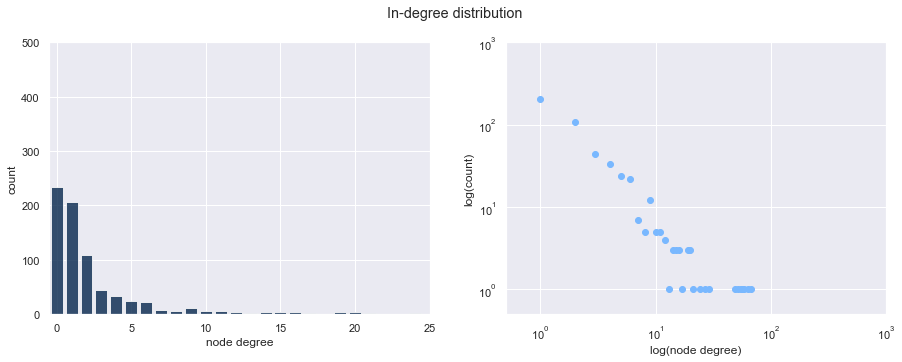

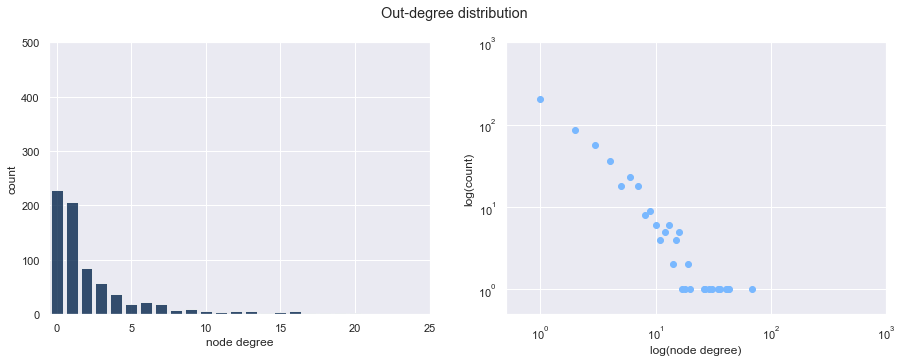

In [13]:
blue = ['#c8e1ff','#79b8ff','#0366d6','#044289','#05264c']

def degree_distribution(G, mode):
    
    # find in or out degrees of network
    if mode.lower() == 'in':
        degree_sequence = [d for n, d in G.in_degree()]
    else:
        degree_sequence = [d for n, d in G.out_degree()]
    # find min and max of degrees     
    dmax = max(degree_sequence)
    dmin = min(degree_sequence)
    
    # compute frequencies of degrees distribution
    counts, bins = np.histogram(degree_sequence, bins = np.arange(dmin-0.5, dmax+1.5,1))
    
    sns.set()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15,5])
    fig.suptitle(mode+'-degree distribution')
    
    # plot histogram 
    ax1.bar(np.arange(dmin, dmax+1,1), counts, color=blue[4], alpha=0.8)
    ax1.set_xlim(-0.5, 25)
    ax1.set_ylim(0, 500)
    ax1.set_xlabel('node degree')
    ax1.set_ylabel('count')
    
    # plot scatter plot on log-log scale
    ax2.loglog(np.arange(dmin, dmax+1,1), counts, 'o', color=blue[1])
    ax2.set_xlim(0.5, 10**3)
    ax2.set_ylim(0.5, 10**3)
    ax2.set_xlabel('log(node degree)')
    ax2.set_ylabel('log(count)')
    plt.show()
    
degree_distribution(GCC,'In')
degree_distribution(GCC,'Out')

## Visualization

### Network visualization

In [26]:
# Convert to undirected graph
giant = GCC.to_undirected()

# Scale node-size according to degree
d = dict(giant.degree)
sizes = [v * 7 for v in d.values()]

# color
blue = ['#c8e1ff','#79b8ff','#0366d6','#044289','#05264c']

# Specify settings for the Force Atlas 2 algorithm
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True, # Dissuade hubs
    linLogMode=False,  
    adjustSizes=False,
    edgeWeightInfluence=1.0,

    # Performance
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,

    # Log
    verbose=True)

# Get positions based on theForce Atlas 2 algorithm
positions = forceatlas2.forceatlas2_networkx_layout(giant, pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:08<00:00, 223.22it/s]

BarnesHut Approximation  took  2.79  seconds
Repulsion forces  took  5.47  seconds
Gravitational forces  took  0.06  seconds
Attraction forces  took  0.05  seconds
AdjustSpeedAndApplyForces step  took  0.26  seconds


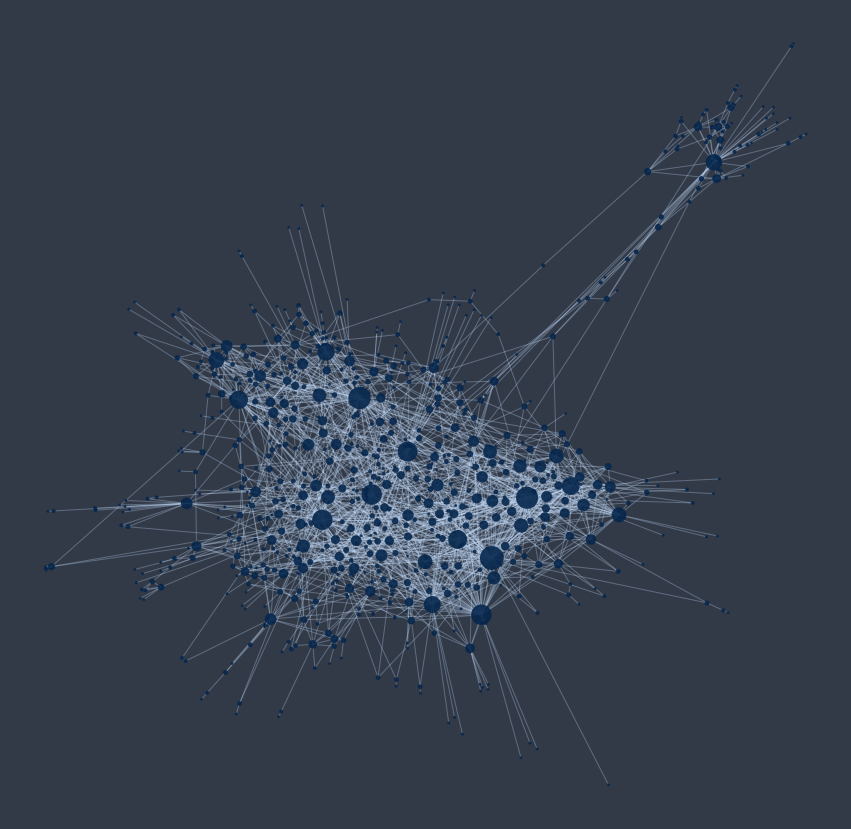

In [27]:
# Set style and figure size
jtplot.style('chesterish')
fig = plt.figure(figsize=(15,15))

# Draw network
nx.draw_networkx_nodes(giant, positions, node_color=blue[4], alpha=0.9, node_size=sizes)
nx.draw_networkx_edges(giant, positions, edge_color=blue[0], alpha=0.3)
 
# Create legend, remove axes and set title
#plt.scatter([], [], c=blue[4], alpha=0.9, s=100, label='Github users')
#plt.legend(scatterpoints=1, frameon=False, labelspacing=1)
#plt.title('The Github network', fontsize=16)
plt.axis('off')

plt.show()
fig.savefig('githubnetwork.png', facecolor=fig.get_facecolor(), transparent=True)

## Sentiment analysis

In [44]:
partition = community.best_partition(giant, random_state=26)
size = float(len(set(partition.values())))
print(f'Number of communities: {size}')

Number of communities: 13.0


Number of communities: 13.0

Actual size of each community
[4, 14, 14, 33, 33, 34, 35, 41, 81, 85, 100, 114, 149]

Bins
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]


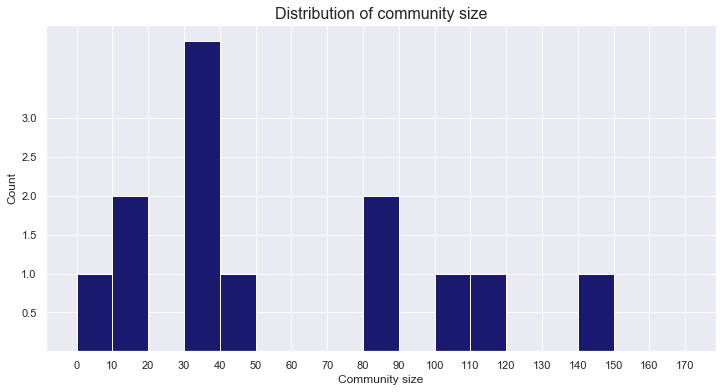

In [48]:
# get communities
partition = community.best_partition(giant, random_state=26)
size = float(len(set(partition.values())))
print(f'Number of communities: {size}')

# get communities and sizes
values = [val for val in partition.values()]
bins, counts = np.unique(values, return_counts=True)
print('\nActual size of each community')
print(sorted(counts))

# define bins 0-10,10-20, 20-30 etc
bins_def = [x*10 for x in list(range(18))]

print('\nBins')
print(bins_def)

# create histogram
plt.figure(figsize=(12, 6))
plt.hist(counts, color='midnightblue', bins=bins_def)
plt.xticks(bins_def)
plt.yticks([0.5, 1, 1.5, 2, 2.5, 3])
plt.xlabel('Community size')
plt.ylabel('Count')
plt.title('Distribution of community size', fontsize=16)
plt.show()

In [76]:
df_gcc = df[df['user_name'].isin(list(GCC.nodes))]
df_gcc.reset_index(drop=True)

user_name         owner                                    repos  \
0    josephmisiti  josephmisiti                 awesome-machine-learning   
1            wepe          wepe                          MachineLearning   
2         ZuzooVn       ZuzooVn  machine-learning-for-software-engineers   
3           rasbt         rasbt             python-machine-learning-book   
4    Jack-Cherish  Jack-Cherish                         Machine-Learning   
..            ...           ...                                      ...   
732  sahil-b-shah  EpistasisLab                                     tpot   
733        sohnam  EpistasisLab                                     tpot   
734        spiros  EpistasisLab                                     tpot   
735     trang1618  EpistasisLab                                     tpot   
736     weixuanfu  EpistasisLab                                     tpot   

                  name  type  \
0        Joseph Misiti  User   
1                wepon  User   
2               Nam Vu  User   
3    Sebastian Raschka  User   
4             Jack Cui  User   
..                 ...   ...   
732         Sahil Shah  User   
733                NaN  User   
734     Spiros Denaxas  User   
735           Trang Le  User   
736         Weixuan Fu  User   

                                               company          location  \
0                                       Math & Pencil       Brooklyn, NY   
1                                               AntFin    China Hangzhou   
2                                                  NaN           Vietnam   
3                                           UW-Madison       Madison, WI   
4                              Northeastern University             China   
..                                                 ...               ...   
732                                                NaN               NaN   
733                                                NaN               NaN   
734  University College London, Institute of Health...            London   
735                                      @EpistasisLab  Philadelphia, PA   
736                         University of Pennsylvania               NaN   

                                                   bio            created_at  \
0          Mathematician & Co-founder of Math & Pencil  2010-04-17T21:09:13Z   
1                                                  NaN  2014-10-10T14:28:18Z   
2    A Vietnamese Software Engineer who is really p...  2012-02-11T16:55:02Z   
3    Machine Learning researcher & open source cont...  2013-10-05T16:06:10Z   
4                              :octocat:公众号：JackCui-AI  2016-01-25T03:38:06Z   
..                                                 ...                   ...   
732                                                NaN  2011-05-29T17:35:13Z   
733                                                NaN  2016-08-15T18:35:26Z   
734  Using AI & data to improve human health; Profe...  2008-09-09T09:01:51Z   
735                                     Postdoc fellow  2012-04-25T18:38:21Z   
736                                   Bioinformatician  2016-08-17T15:27:19Z   

               updated_at                                          following  \
0    2020-10-29T18:11:39Z  [mojombo, defunkt, vanpelt, macournoyer, ry, b...   
1    2020-11-05T15:54:10Z  [pluskid, benanne, colah, kennethreitz42, karp...   
2    2020-10-12T02:40:45Z  [ole, escoz, pokeb, tcdoan, dyang, kirill-grou...   
3    2020-11-09T23:00:46Z  [ctb, ogrisel, tacaswell, GaelVaroquaux, mblon...   
4    2020-07-31T13:54:15Z  [kennethreitz42, karpathy, marvis, shicai, tia...   
..                    ...                                                ...   
732  2020-09-11T14:21:55Z                               [agitter, weixuanfu]   
733  2020-09-12T07:19:17Z                                                 []   
734  2020-11-01T10:25:46Z  [kaoru, argp, koikonom, freyfogle, anm, Tallma...   
735  2020-11-10T14:32:58Z  [makeyour

In [101]:
def tokenize(df):
    df['Tokens'] = ""
    for i,content in enumerate(df['description']):
        try:
            text = content.translate(str.maketrans('', '', string.punctuation)).split() # split to tokens
            sw = stopwords.words("english") # set stopwords
            wordnet_lemmatizer = WordNetLemmatizer() # set lemmatizer
            words1= [t.lower() for t in text] # lower letters
            words11 = [t for t in words1 if t not in sw]   # remove stopwords
            words2 = [wordnet_lemmatizer.lemmatize(t) for t in words11]  # lemmatize
            words3 = [x for x in words2 if not any(c.isdigit() for c in x)] # remove words with numbers
            df['Tokens'][i] = words3
        except:
            print(i)

            


In [90]:
df_gcc.iloc[148]['description']

nan

In [102]:
tokenize(df_gcc)

C:\Users\Julie Maria Petersen\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Julie Maria Petersen\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Julie Maria Petersen\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

148
283
416
423


In [49]:
# get top 10 largest communities
top = np.argsort(counts)[-13:]
n_top = len(top)

def get_com(comnum):
    com = [k for k,v in zip(partition.keys(),partition.values()) if v==comnum]   
    df = dc_df[dc_df['WikiLink'].isin(com)]
    TF, text = get_TF(df)
    
    #remove unimportant words from TF   
    remove = ['comic','dc','character']  
    for r in remove:
        TF[r] = 0
        
    return com, df, TF, text

In [ ]:
# get tokens and TFs for each community
texts = [list(get_com(top[i])[2].keys()) for i in range(n_top) ]
TFs = [list(get_com(top[i])[2].values()) for i in range(n_top)]

# define documents
Docs = [f'Doc{i}' for i in range(n_top)]

DF = pd.DataFrame()

for i in range(n_top):
    DF1 = pd.DataFrame()
    DF1['Words'] = texts[i]
    DF1[Docs[i]] = TFs[i]    
    DF = pd.concat([DF,DF1])
    
DF_group = DF.groupby(['Words']).sum().reset_index()
DF_group.replace(0, np.nan, inplace=True)

# find document frequncy for each word
DF_group['DF'] = DF_group[DF_group.columns[1:]].count(axis=1)

# then calculate IDF
DF_group['IDF'] = [np.log(n_top)/(nt+1)+1 for nt in DF_group['DF']]

# lastly calculate TF-IDF for each word in each document
for i in range(n_top):
    DF_group[f'{Docs[i]}_TFIDF'] = DF_group[Docs[i]]*DF_group['IDF']
    
DF_group.head()